<a href="https://colab.research.google.com/github/KevinDinh03/Machine-learning-for-Airbnb-reccomendations/blob/main/Machine_learning_for_Airbnb_reccomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

test = pd.read_csv('/content/drive/MyDrive/dataset/AirBnB.csv')
test.head()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restaurant Index,Normalised Restaurant Index,Room_Type_Entire home/apt,Room_Type_Private room,Room_Type_Shared room,Guest Satisfaction
0,194.033698,2,1,0,10,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,0,1,0,Excellent
1,NaN,4,0,0,8,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,0,1,0,Good
2,NaN,2,0,1,9,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,0,1,0,Good
3,433.529398,4,0,1,9,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,0,1,0,Excellent
4,485.552926,2,0,0,10,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,0,1,0,Excellent


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test['Guest Satisfaction'] = encoder.fit_transform(test['Guest Satisfaction'])

Text(0.5, 1.0, 'Correlation of variables')

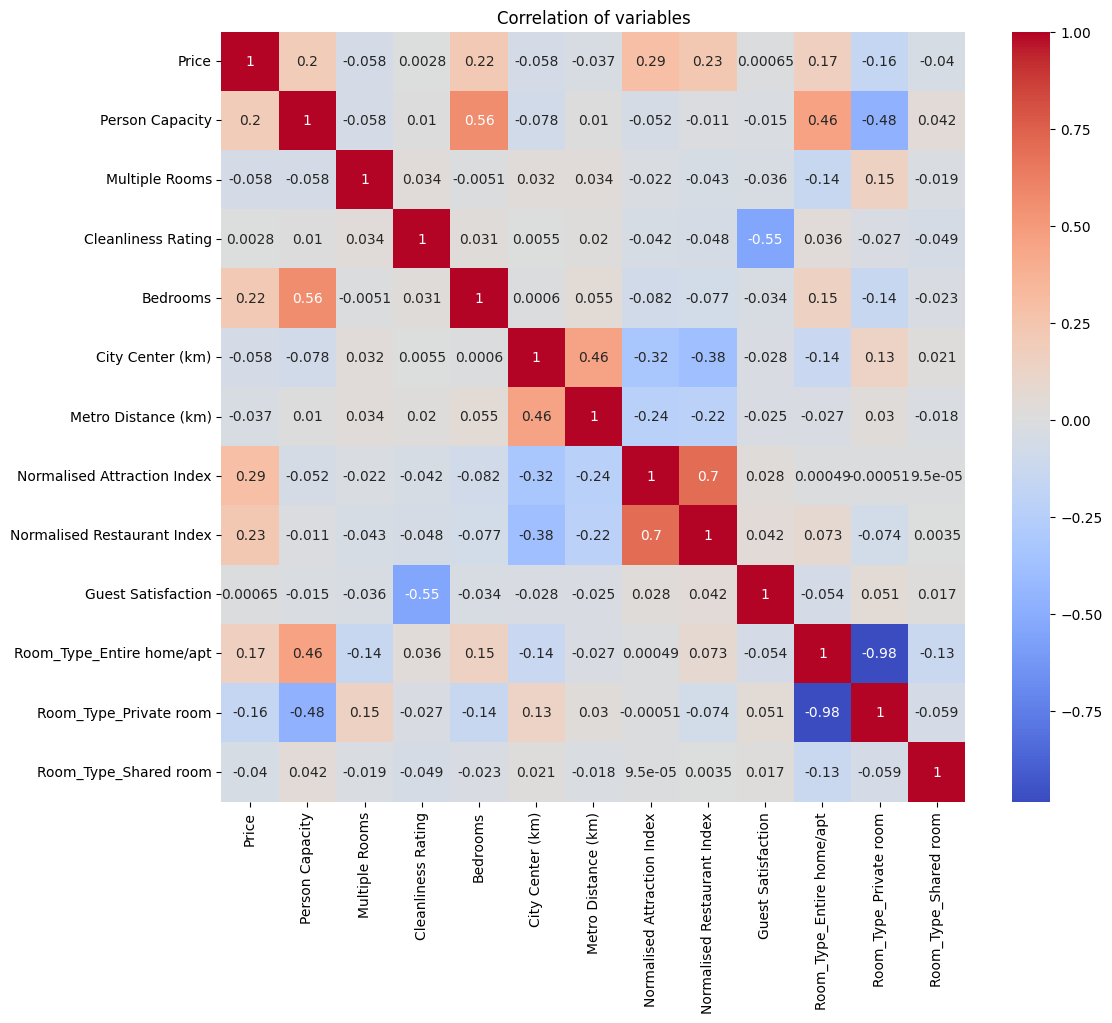

In [5]:
#heatmap
test.dropna()
plt.figure(figsize=(12, 10))
corr_matrix = test[['Price', 'Person Capacity', 'Multiple Rooms', 'Cleanliness Rating',
                    'Bedrooms', 'City Center (km)', 'Metro Distance (km)',
                    'Normalised Attraction Index', 'Normalised Restaurant Index',
                    'Guest Satisfaction','Room_Type_Entire home/apt',
                    'Room_Type_Private room',	'Room_Type_Shared room']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation of variables")

In [7]:
#defining x and y
#removing rows with null values and removing irrelevant columns
test_cleaned = test.dropna() #price, city center and metro distance have nulls
x = test_cleaned.drop(['Business','Attraction Index', 'Restaurant Index', 'Guest Satisfaction'], axis=1).values
y = test_cleaned[['Guest Satisfaction']].values

In [8]:
test_cleaned.head()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restaurant Index,Normalised Restaurant Index,Room_Type_Entire home/apt,Room_Type_Private room,Room_Type_Shared room,Guest Satisfaction
0,194.033698,2,1,0,10,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,0,1,0,1
3,433.529398,4,0,1,9,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,0,1,0,1
4,485.552926,2,0,0,10,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,0,1,0,1
5,552.808567,3,0,0,8,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376,0,1,0,1
6,215.124317,2,0,0,10,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251,0,1,0,1


In [10]:
#standardise data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x)
x.columns = ['Price', 'Person Capacity', 'Multiple Rooms', 'Cleanliness Rating', 'Bedrooms',
             'City Center (km)', 'Metro Distance (km)', 'Normalised Attraction Index',
             'Normalised Restaurant Distance', 'Room_Type_Entire home/apt',	'Room_Type_Private room',
             'Room_Type_Shared room']
x

,Price,Person Capacity,Multiple Rooms,Cleanliness Rating,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restaurant Distance,Room_Type_Entire home/apt,Room_Type_Private room,Room_Type_Shared room
0,-0.246913,-0.953587,1.538123,0.629458,-0.259534,1.177825,2.777070,-0.903103,-1.012942,-1.447073,1.471277,-0.085244
1,0.646326,0.587623,-0.650143,-0.495512,1.291283,-1.153591,-0.228455,1.723330,1.918631,-1.447073,1.471277,-0.085244
2,0.840357,-0.953587,-0.650143,0.629458,-0.259534,-1.073227,-0.401934,2.100637,1.693219,-1.447073,1.471277,-0.085244
3,1.091198,-0.182982,-0.650143,-1.620482,1.291283,-0.275656,1.868454,-0.294306,-0.533839,-1.447073,1.471277,-0.085244
4,-0.168252,-0.953587,-0.650143,0.629458,-0.259534,-0.401487,0.186507,-0.133528,-0.467553,-1.447073,1.471277,-0.085244
...,...,...,...,...,...,...,...,...,...,...,...,...
29382,-0.538200,0.587623,1.538123,-0.495512,-0.259534,0.182028,-0.416966,-0.461269,-1.110793,-1.447073,1.471277,-0.085244
29383,1.699619,2.128833,-0.650143,0.629458,2.842100,-1.080545,-0.664257,0.478220,-0.809399,0.691050,-0.679682,-0.085244
29384,1.405834,-0.953587,-0.650143,0.629458,-0.259534,-0.847373,-0.568212,0.047001,-1.014213,0.691050,-0.679682,-0.085244
29385,0.152237,-0.953587,-0.650143,0.629458,-0.259534,0.183117,-0.446681,-0.465680,-1.176186,-1.447073,1.471277,-0.085244


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = logistic_model.predict(x_test)


classification_rep = classification_report(y_test, y_pred)


print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.17      0.27        18
           1       0.86      0.97      0.91      7026
           2       0.67      0.36      0.47      1644
           3       0.38      0.05      0.08       110
           4       0.69      0.58      0.63        19

    accuracy                           0.84      8817
   macro avg       0.67      0.42      0.47      8817
weighted avg       0.82      0.84      0.82      8817



In [13]:
#confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   3,    1,   10,    1,    3],
       [   0, 6832,  194,    0,    0],
       [   0, 1051,  588,    4,    1],
       [   1,   23,   80,    5,    1],
       [   0,    1,    4,    3,   11]])